In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

In [12]:
df = pd.read_excel(r"C:\Users\pc\Documents\JUPYTER ML\Insurance Fraud Detection Model\data\US Insurance Claims Data (1).xlsx")
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,154,34,795697,2022-03-30 19:28:31.971,IL,500/1000,998,856.999452,3998347,419228,FEMALE,Associate,priv-house-serv,yachting,husband,800,0,2023-11-26 16:56:09.937,Multi-vehicle Collision,Front Collision,Minor Damage,Other,SC,Columbus,9489 3rd St,9,3,NO,2,1,?,67253,11362,11390,46297,Ford,F150,1997,N
1,172,36,792268,2001-04-27 22:40:12.961,OH,250/500,987,1282.389619,0,420170,MALE,College,machine-op-inspct,basketball,unmarried,51203,0,2018-02-14 10:45:28.353,Single Vehicle Collision,Rear Collision,Total Loss,Fire,SC,Springfield,9818 Cherokee Ave,22,1,YES,2,3,NO,52481,9427,9428,33509,Accura,MDX,1980,N
2,353,47,568504,2011-12-25 09:00:46.445,IN,250/500,1976,1145.490048,0,421251,MALE,High School,prof-specialty,camping,husband,0,0,2021-01-25 02:32:56.598,Single Vehicle Collision,Side Collision,Minor Damage,Other,SC,Columbus,2862 Tree Ridge,5,1,YES,0,3,?,62665,5441,11077,44771,Dodge,RAM,2010,N
3,47,37,971810,2021-12-17 10:10:11.341,IN,250/500,1999,1255.267879,0,421620,MALE,High School,other-service,movies,not-in-family,74892,0,2023-10-29 03:24:47.309,Parked Car,?,Minor Damage,NaN,NY,Hillsdale,8749 Tree St,18,1,NO,1,0,NO,6614,670,667,5423,Jeep,Wrangler,1983,N
4,301,50,898345,2001-01-25 21:42:10.693,IL,100/300,1995,1376.096761,0,421961,FEMALE,High School,farming-fishing,bungie-jumping,own-child,0,-42222,2018-01-20 00:28:30.891,Multi-vehicle Collision,Front Collision,Total Loss,Fire,NY,Hillsdale,5924 Maple Drive,21,3,YES,0,2,?,66431,12218,6086,48589,Volkswagen,Jetta,2036,N


In [13]:
train = pd.read_csv(r"C:\Users\pc\Documents\JUPYTER ML\ETEProject\src\notebook\insurance_fraud_train.csv")
train.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,bind_year,bind_month,bind_dayofweek,bind_day,bind_hour,make_model
0,365,55,643651,2.0,0.0,1002,1094.148443,0,443289,0.0,3.0,7.0,0.0,4.0,43637,-71277,0.0,2.0,2.0,4.0,1.0,2.0,463.0,0,3,0.0,0,3,0.0,39096,0,0,39480,2040,0,2014,12,1,23,18,33.0
1,448,54,381162,0.0,1.0,501,1286.360395,0,596624,0.0,0.0,8.0,15.0,2.0,0,-55516,0.0,3.0,1.0,4.0,1.0,5.0,219.0,18,3,2.0,2,1,0.0,60096,6103,6137,49532,2006,0,2000,9,0,4,4,27.0
2,202,38,154023,0.0,1.0,504,1428.857533,0,594736,0.0,5.0,7.0,16.0,1.0,0,0,2.0,0.0,0.0,0.0,5.0,1.0,458.0,7,1,1.0,0,1,2.0,54930,0,6194,49803,2002,1,2002,8,4,2,9,25.0
3,297,49,742874,2.0,1.0,1005,1145.797021,0,444291,0.0,1.0,6.0,11.0,5.0,0,0,1.0,1.0,3.0,2.0,6.0,1.0,341.0,6,1,1.0,1,2,2.0,5343,901,912,3604,1983,0,2011,6,4,17,23,30.0
4,3,29,271139,0.0,0.0,504,1004.197706,5030810,611835,0.0,3.0,8.0,5.0,4.0,0,0,1.0,1.0,3.0,4.0,3.0,6.0,90.0,3,1,1.0,2,1,1.0,4888,497,1008,3483,1995,1,2017,2,2,15,0,23.0


Model Development on Train and Validation Set


In [14]:
new_train = train[['incident_severity', 'vehicle_claim', 'total_claim_amount', 'property_claim', 'injury_claim', 'property_damage', 'incident_state', 'umbrella_limit', 'number_of_vehicles_involved', 'incident_type']]

In [15]:
x = new_train
y = train['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

XGBoost Classifier

In [16]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [17]:
y_xgb_pred = xgb.predict(x_test)
y_xgb_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(1280,))

In [18]:
y_xgb_proba = xgb.predict_proba(x_test)[:,1]
y_xgb_proba

array([0.03016478, 0.0643096 , 0.01995157, ..., 0.01072995, 0.00201495,
       0.92833126], shape=(1280,), dtype=float32)

Model Evaluation on Train and Validation Set

Confusion Matrix of Validation set

In [19]:
CM = confusion_matrix(y_test, y_xgb_pred)
CM = pd.DataFrame(CM)
CM

,0,1
0,956,10
1,18,296


Heatmap of Confusion Matrix of Validation set

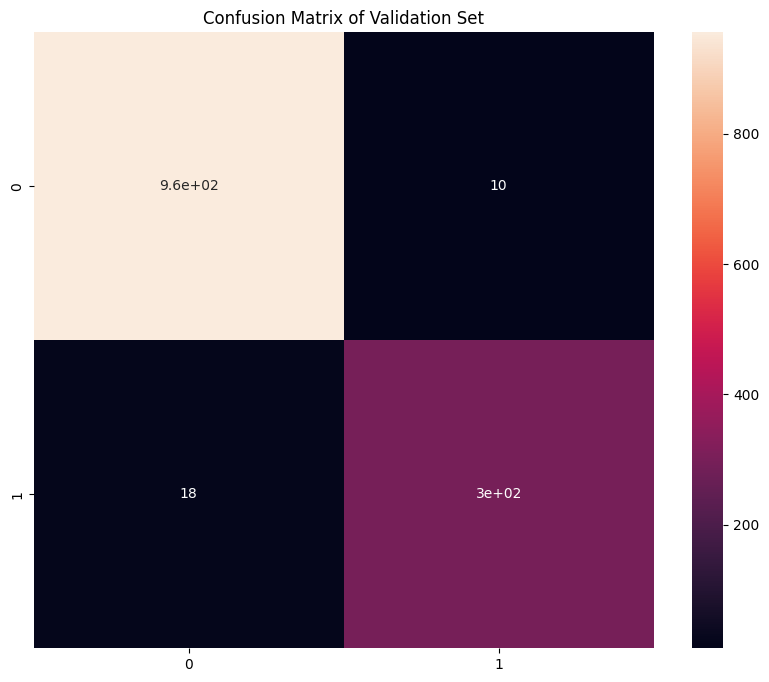

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(CM, annot=True)
plt.title('Confusion Matrix of Validation Set')
plt.show()

Classification Report of Validation set

In [21]:
CR = classification_report(y_test, y_xgb_pred, output_dict=True)
CR = pd.DataFrame(CR)
CR

,0,1,accuracy,macro avg,weighted avg
precision,0.981520,0.967320,0.978125,0.974420,0.978036
recall,0.989648,0.942675,0.978125,0.966162,0.978125
f1-score,0.985567,0.954839,0.978125,0.970203,0.978029
support,966.000000,314.000000,0.978125,1280.000000,1280.000000


Heatmap of Classification Report of Validation set

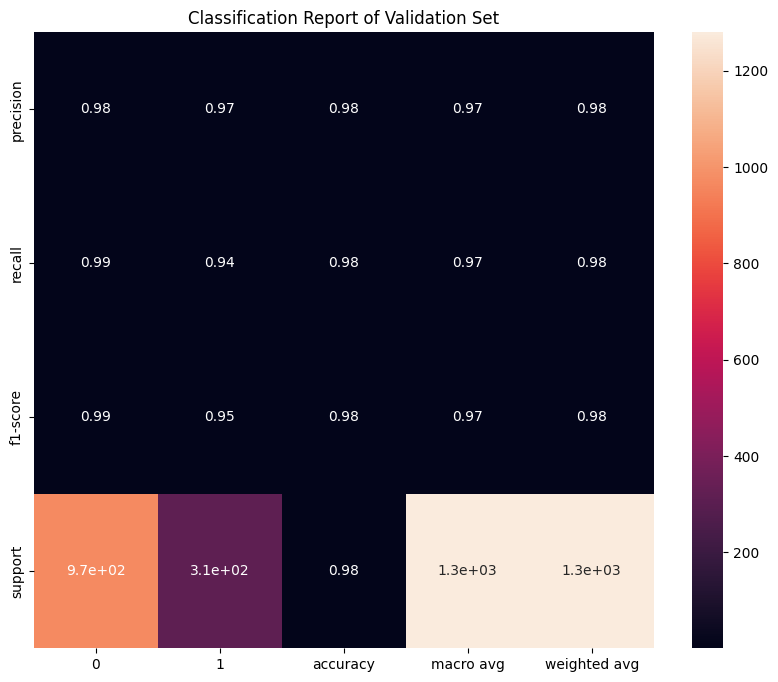

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(CR, annot=True)
plt.title('Classification Report of Validation Set')
plt.show()

Accuracy Score of Validation set

In [23]:
print('Accuracy Score:', accuracy_score(y_test, y_xgb_pred) *100)
print('ROC-AUC:', roc_auc_score(y_test, y_xgb_proba) *100)

Accuracy Score: 97.8125
ROC-AUC: 99.80680724242063


Feature importance

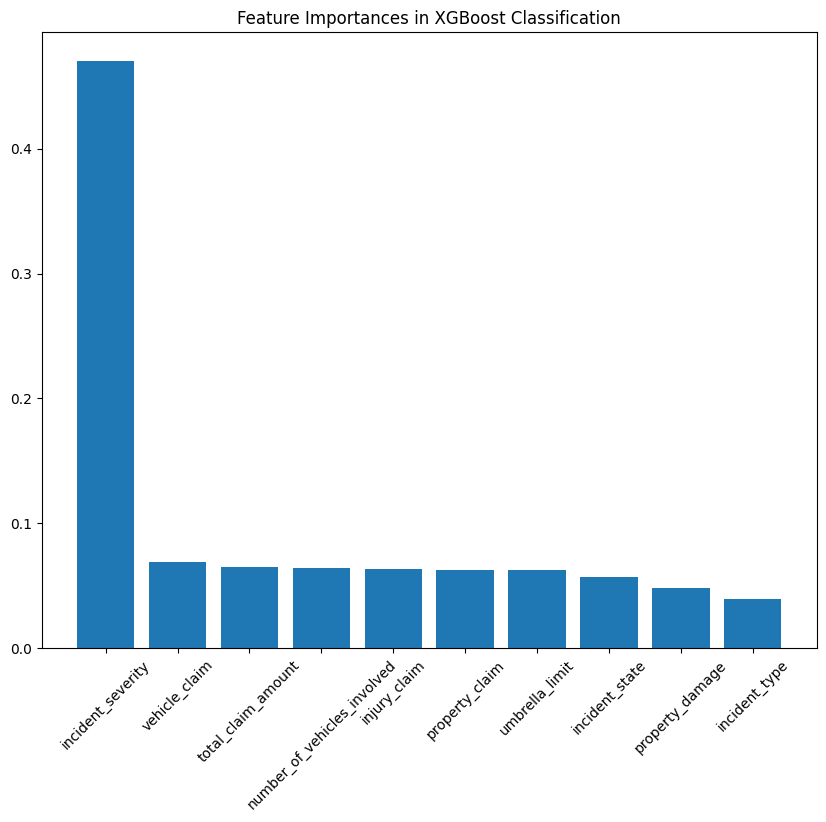

In [24]:
importance = xgb.feature_importances_
indices = np.argsort(importance)[::-1]
features = new_train.columns

plt.figure(figsize=(10,8))
plt.bar(range(x.shape[1]), importance[indices],  align="center")
plt.xticks(range(x.shape[1]), [features[i] for i in indices], rotation=45)
plt.title("Feature Importances in XGBoost Classification")
plt.show()

Cross Validation

In [25]:
cross_val_score(xgb, x_train, y_train, cv=4)

array([0.97734375, 0.9640625 , 0.9671875 , 0.971875  ])

Test Set Importing 

In [26]:
test = pd.read_csv(r"C:\Users\pc\Documents\JUPYTER ML\ETEProject\src\notebook\insurance_fraud_test.csv")
test.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,bind_year,bind_month,bind_dayofweek,bind_day,bind_hour,make_model
0,136,33,300259,IL,250/500,504,1364.275565,5048005,450492,FEMALE,JD,exec-managerial,paintball,own-child,57693,-56133,Single Vehicle Collision,Side Collision,Minor Damage,Other,NY,Springfield,6889 Cherokee St,6,1,NO,2,0,NaN,95538,14914,14822,66407,1997,N,2016,7,3,28,6,BMW_X5
1,259,43,132108,IL,100/300,503,931.390342,0,454080,FEMALE,Masters,farming-fishing,base-jumping,not-in-family,0,-39830,Vehicle Theft,NaN,Trivial Damage,Police,SC,Riverwood,2873 Flute Ave,15,1,NO,1,3,NO,7555,1278,648,5741,1993,N,2011,6,5,11,16,Audi_A5
2,210,36,736239,IN,100/300,2003,1227.938426,0,445149,FEMALE,MD,craft-repair,camping,wife,0,0,Multi-vehicle Collision,Rear Collision,Total Loss,Ambulance,PA,Hillsdale,2711 Britain Ave,17,3,NaN,1,3,NaN,66391,8077,8209,48515,2007,N,2014,10,2,29,7,Jeep_Wrangler
3,195,39,614548,IN,250/500,498,825.172857,0,458375,MALE,Masters,adm-clerical,paintball,own-child,0,0,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,1126 Texas Hwy,3,3,NaN,2,2,NO,62875,6166,12159,43540,1992,N,2015,6,2,10,17,Dodge_RAM
4,319,47,755332,IN,250/500,1005,1032.660012,0,469304,MALE,MD,sales,yachting,other-relative,43810,0,Single Vehicle Collision,Front Collision,Major Damage,Fire,WV,Arlington,7877 3rd Ridge,18,1,NO,2,1,NO,104901,18808,18920,65968,2024,Y,2016,4,0,4,12,Mercedes_ML350


Test Set Precleaning Transformation

In [27]:
imp_one = SimpleImputer(strategy='constant', fill_value='No collision')
test[['collision_type']] = imp_one.fit_transform(test[['collision_type']])

imp_two = SimpleImputer(strategy='constant', fill_value='None')
test[['authorities_contacted']] = imp_two.fit_transform(test[['authorities_contacted']])

imp_three = SimpleImputer(strategy='constant', fill_value='Unkown')
test[['property_damage']] = imp_three.fit_transform(test[['property_damage']])

imp_four = SimpleImputer(strategy='constant', fill_value='Unkown')
test[['police_report_available']] = imp_four.fit_transform(test[['police_report_available']])

Test Set Preprocessing Transformation

In [28]:
df_test = test.select_dtypes(include=['object']).columns.tolist()
df_test.remove('fraud_reported')

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
test[df_test] = encoder.fit_transform(test[df_test])

label_encoder = LabelEncoder()
test['fraud_reported'] = label_encoder.fit_transform(test['fraud_reported'])


Model Development on Test Set

In [29]:
new_test = test[['incident_severity', 'vehicle_claim', 'total_claim_amount', 'property_claim', 'injury_claim', 'property_damage', 'incident_state', 'umbrella_limit', 'number_of_vehicles_involved', 'incident_type']]

In [30]:
x_test = new_test
y_test = test['fraud_reported']

In [31]:
y_xgb_test = xgb.predict(x_test)

Model Evaluation on Test Set

Confusion Matrix of Test set

In [32]:
CM = confusion_matrix(y_test, y_xgb_test)
CM = pd.DataFrame(CM)
CM

,0,1
0,1177,18
1,19,386


Heatmap of Confusion Matrix of Test set

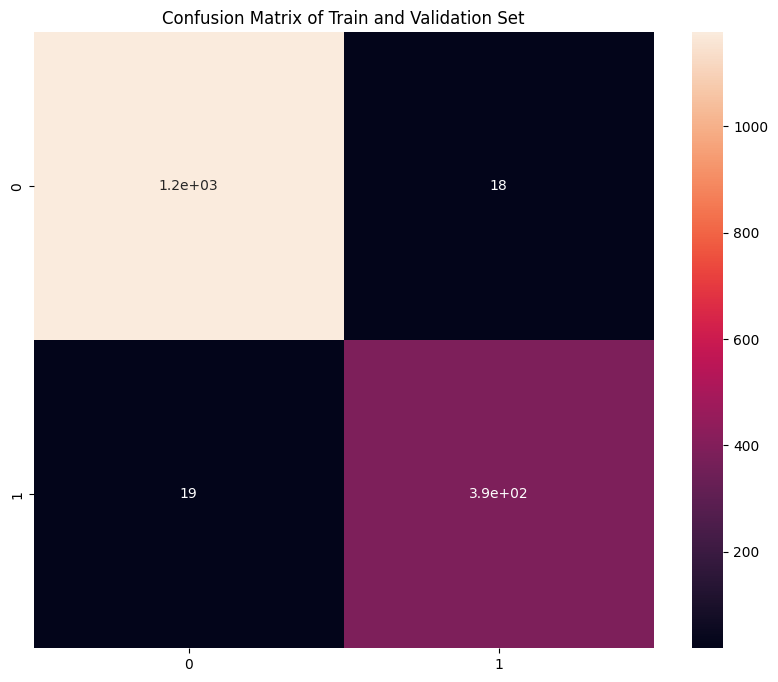

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(CM, annot=True)
plt.title('Confusion Matrix of Train and Validation Set')
plt.show()

Classification Report of Test set

In [34]:
CR = classification_report(y_test, y_xgb_test, output_dict=True)
CR = pd.DataFrame(CR)
CR

,0,1,accuracy,macro avg,weighted avg
precision,0.984114,0.955446,0.976875,0.969780,0.976857
recall,0.984937,0.953086,0.976875,0.969012,0.976875
f1-score,0.984525,0.954265,0.976875,0.969395,0.976866
support,1195.000000,405.000000,0.976875,1600.000000,1600.000000


Heatmap of Classification Report of Test set

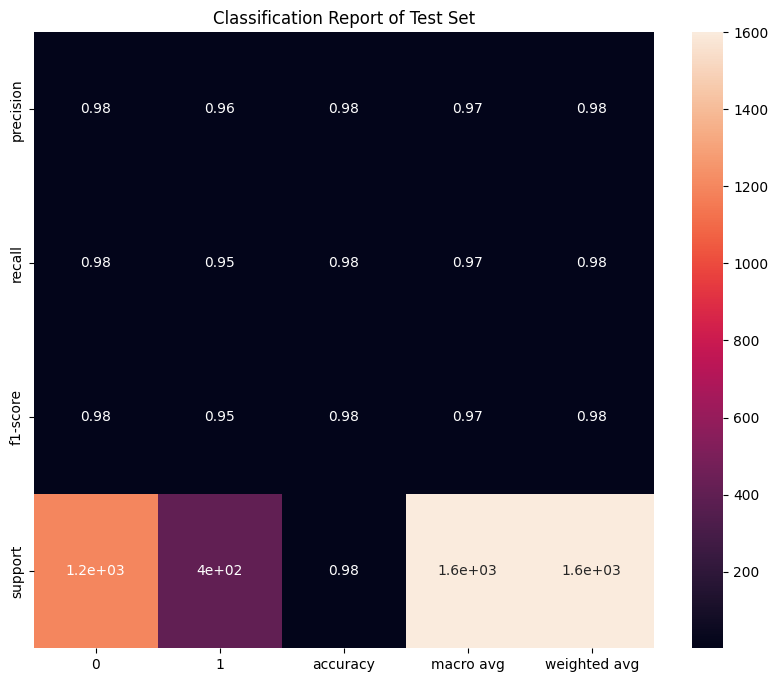

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(CR, annot=True)
plt.title('Classification Report of Test Set')
plt.show()

Accuracy Score of Test set

In [36]:
print('Accuracy Score:', accuracy_score(y_test, y_xgb_test) *100)

Accuracy Score: 97.6875


Visualization of Actual vs Predicted Classification for XGBoost Classification Model

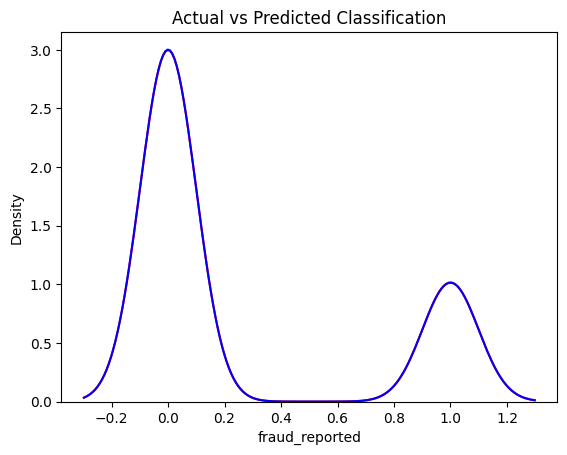

In [37]:
ax = sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_xgb_test, color='b', label='Predicted Value', ax=ax)
plt.title('Actual vs Predicted Classification')
plt.show()